In [ ]:
import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np
from astropy.time import Time
from sunpy.coordinates import (
    HeliocentricInertial,
    get_body_heliographic_stonyhurst,
    get_horizons_coord,
)


class Plotter:
    def __init__(self, obstime, frame, period, direction):
        self.obstime = obstime
        self.frame = frame
        self.period = period
        assert direction in [
            "forward",
            "backward",
            "both",
        ], "direction must be forward, backward or both"
        self.direction = direction

    def orbit(self, ax, kind, name, color, search_name=None):
        obstime = self.obstime
        hci_frame = self.frame
        period = self.period
        direction = self.direction

        if kind == "planet":
            f = get_body_heliographic_stonyhurst
        elif kind == "mission":
            f = get_horizons_coord

        print("Search", search_name)

        try:
            if search_name:
                coord = f(search_name, obstime)
            else:
                coord = f(name, obstime)
        except Exception:
            return None, None
        coord = coord.transform_to(hci_frame)
        ax.plot(
            coord.lon.to(u.rad),
            coord.distance,
            "o",
            color=color,
            label=name,
            markersize=10,
            zorder=100,
        )
        if direction == "forward":
            times = obstime + np.arange(period) * u.day
        if direction == "backward":
            times = sorted(obstime - np.arange(period) * u.day)
        if direction == "both":
            forward_times = obstime + np.arange(period) * u.day
            backward_times = sorted(obstime - np.arange(period) * u.day)
            times = np.concatenate([backward_times, forward_times])

        if search_name:
            coords = f(search_name, times)
        else:
            coords = f(name, times)
        coords = coords.transform_to(hci_frame)
        ax.plot(
            coords.lon.to(u.rad), coords.distance, "-", color=color, zorder=100, lw=3
        )
        return coord, coords


def plot_body_position(
    names, obstime, period, direction, earth_adjust, earth_lon
):
    obstime = Time(obstime)
    hci_frame = HeliocentricInertial(obstime=obstime)
    if direction == "forward":
        title_str = f"Next {period} days"
    if direction == "backward":
        title_str = f"Previous {period} days"
    if direction == "both":
        title_str = f"Previous and Next {period} days"
    plotter = Plotter(
        obstime=obstime, frame=hci_frame, period=period, direction=direction
    )

    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(projection="polar")
    # ------------------------------------------------------------
    fig.patch.set_facecolor("black")  # Set figure background color
    ax.set_facecolor("black")  # Set axes background color
    ax.xaxis.label.set_color("white")  # Set X-axis label color
    ax.yaxis.label.set_color("white")  # Set Y-axis label color
    ax.title.set_color("white")  # Set title color
    ax.tick_params(
        axis="x", colors="white", direction="in", top=True
    )  # X-axis ticks
    ax.tick_params(
        axis="y", colors="white", direction="in", right=True
    )  # Y-axis ticks
    r_list = [0.5, 1, 1.5, 2]
    r_max = 1.8
    if "Jupiter" in names or "Juno" in names:
        r_list = [1, 2, 3, 4, 5, 6]
        r_max = 7
    if "Saturn" in names:
        r_list = [1, 5, 10]
        r_max = 11
    if "Uranus" in names:
        r_list = [1, 5, 10, 15, 20]
        r_max = 21
    if "Neptune" in names:
        r_list = [1, 10, 20, 30]
        r_max = 31
    if "Voayger 1" in names or "Voyager 2" in names:
        r_list = [1, 50, 100, 150, 200]
        r_max = 201
    ax.set_rticks(r_list)
    ax.set_rlim(0, r_max)
    ax.set_rlabel_position(0)
    # ax.xaxis.set_tick_params(labelsize=15)
    # ax.yaxis.set_tick_params(labelsize=15)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    # ax.xaxis.grid(True, color="white", linestyle="-", linewidth=2)
    # ax.yaxis.grid(True, color="white", linestyle="-", linewidth=2)
    ax.grid(False)
    ax.axis("off")
    # theta = np.linspace(0, 2 * np.pi, 100)
    # for r in r_list:
    #     ax.plot(theta, np.full_like(theta, r), "w-", lw=0.5)
    # ==============================================================================
    ax.plot(0, 0, "o", markersize=10, color="yellow", label="Sun", zorder=200)
    # ------------------------------------------------------------
    earth_coord, _ = plotter.orbit(
        ax, kind="planet", name="Earth", color="lime"
    )
    if earth_adjust:
        if earth_lon == "S":
            earth_pos = 270
        if earth_lon == "N":
            earth_pos = 90
        if earth_lon == "E":
            earth_pos = 0
        if earth_lon == "W":
            earth_pos = 180
        # earth_pos = earth_lon
        ax.set_theta_offset(
            np.deg2rad(earth_pos - earth_coord.lon.to(u.deg).value)
        )
    # ------------------------------------------------------------
    for name in names:
        if name == "Mercury":
            kind, color = "planet", "lavender"
            search_name = None
        if name == "Venus":
            kind, color = "planet", "coral"
            search_name = None
        if name == "Mars":
            kind, color = "planet", "red"
            search_name = None
        if name == "Jupiter":
            kind, color = "planet", "peachpuff"
            search_name = None
        if name == "Saturn":
            kind, color = "planet", "lightsteelblue"
            search_name = None
        if name == "Uranus":
            kind, color = "planet", "skyblue"
            search_name = None
        if name == "Neptune":
            kind, color = "planet", "deepskyblue"
            search_name = None
        if name == "STEREO-A":
            kind, color = "mission", "cyan"
            search_name = None
        if name == "STEREO-B":
            kind, color = "mission", "magenta"
            search_name = None
        if name == "Parker Solar Probe":
            kind, color = "mission", "violet"
            search_name = None
        if name == "Solar Orbiter":
            kind, color = "mission", "blue"
            search_name = None
        if name == "Juno":
            kind, color = "mission", "pink"
            search_name = "Juno (spacecraft)"
        if name == "Voyager 1":
            kind, color = "mission", "gold"
            search_name = None
        if name == "Voyager 2":
            kind, color = "mission", "silver"
            search_name = None
        plotter.orbit(
            ax, kind=kind, name=name, color=color, search_name=search_name
        )
    # ==============================================================================
    # fig.legend(
    #     facecolor="black",
    #     labelcolor="white",
    #     frameon=False,
    #     bbox_to_anchor=(0.5, -0.1),
    #     loc="center",
    #     fontsize=15,
    #     ncols=3,
    # )
    # fig.suptitle(
    #     f"{obstime.strftime('%Y-%m-%d %H:%M UTC')}\n{title_str}\nHeliocentric Inertial (HCI) System",
    #     fontsize=20,
    #     color="white",
    #     y=1.01,
    # )
    fig.tight_layout()
    return fig


In [ ]:
from datetime import datetime

Search None
Search None
Search None
Search None
Search None
INFO: Obtained JPL HORIZONS location for STEREO-A (spacecraft) (-234)    [sunpy.coordinates.ephemeris]
INFO: Obtained JPL HORIZONS location for STEREO-A (spacecraft) (-234)    [sunpy.coordinates.ephemeris]
Search None
INFO: Obtained JPL HORIZONS location for Parker Solar Probe (spacecraft) (-96) [sunpy.coordinates.ephemeris]
INFO: Obtained JPL HORIZONS location for Parker Solar Probe (spacecraft) (-96) [sunpy.coordinates.ephemeris]
Search None
INFO: Obtained JPL HORIZONS location for Solar Orbiter (spacecraft) (-144) [sunpy.coordinates.ephemeris]
INFO: Obtained JPL HORIZONS location for Solar Orbiter (spacecraft) (-144) [sunpy.coordinates.ephemeris]


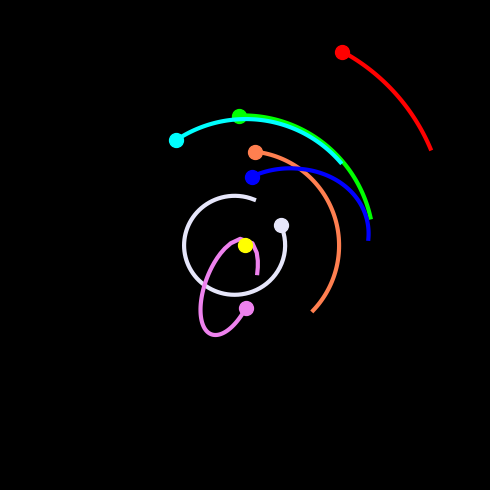

In [ ]:
fig = plot_body_position(
    names=[
        "Mercury",
        "Venus",
        "Mars",
        "STEREO-A",
        "Parker Solar Probe",
        "Solar Orbiter",
    ],
    obstime=datetime.strptime("2025-03-09 00:00:00", "%Y-%m-%d %H:%M:%S"),
    period=80,
    direction="backward",
    earth_adjust=False,
    earth_lon=None,
)
fig.savefig("test.png", dpi=200)